# Task 1

Use this dataset (https://www.dropbox.com/s/pan6mutc5xj5kj0/trainPart1.zip) to train a CNN. Use no other data source or pretrained networks, and explain your design choices during preprocessing, model building and training. Also, cite the sources you used to borrow techniques. A test set will be provided later to judge the performance of your classifier. Please save your model checkpoints.

Let's start by importing all the important libraries.

In [1]:
import tensorflow as tf
import os
import pathlib
import random
from shutil import move
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

## Unzip the trainPart1.zip file

In [2]:
with zipfile.ZipFile("trainPart1.zip", 'r') as zip_ref:
    zip_ref.extractall("trainPart1/")

#### Changing the directories to labels.
All the directories in this dataset are named from sample 001 to sample 062. We change the names of the directories to the label of the images that they contain.

In [3]:
root = "trainPart1/train"

In [4]:
s = os.listdir(root)
s.sort()

#### The code below changes the names of the directories sample 001 to sample 010 to 0 to 9.

In [5]:
i = 0
for file in s:
    source = os.path.join(root, file)
    dest = os.path.join(root, str(i))
    os.rename(source, dest)
    i = i+1
    if (i>9):
        break

#### The directories after renaming first 10.

In [6]:
s = os.listdir(root)
s.sort()
print(s)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'Sample011', 'Sample012', 'Sample013', 'Sample014', 'Sample015', 'Sample016', 'Sample017', 'Sample018', 'Sample019', 'Sample020', 'Sample021', 'Sample022', 'Sample023', 'Sample024', 'Sample025', 'Sample026', 'Sample027', 'Sample028', 'Sample029', 'Sample030', 'Sample031', 'Sample032', 'Sample033', 'Sample034', 'Sample035', 'Sample036', 'Sample037', 'Sample038', 'Sample039', 'Sample040', 'Sample041', 'Sample042', 'Sample043', 'Sample044', 'Sample045', 'Sample046', 'Sample047', 'Sample048', 'Sample049', 'Sample050', 'Sample051', 'Sample052', 'Sample053', 'Sample054', 'Sample055', 'Sample056', 'Sample057', 'Sample058', 'Sample059', 'Sample060', 'Sample061', 'Sample062']


#### Now changing the names of the directories of Capital Letters.

In [7]:
s = os.listdir(root)
s.sort()
for i in range(26):
    j = 'A'
    j = chr(ord(j)+i)
    source = os.path.join(root, s[i+10])
    destination = os.path.join(root, j)
    os.rename(source, destination)
    j = chr(ord(j)+1)

In [8]:
s = os.listdir(root)
s.sort()
print(s)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'Sample037', 'Sample038', 'Sample039', 'Sample040', 'Sample041', 'Sample042', 'Sample043', 'Sample044', 'Sample045', 'Sample046', 'Sample047', 'Sample048', 'Sample049', 'Sample050', 'Sample051', 'Sample052', 'Sample053', 'Sample054', 'Sample055', 'Sample056', 'Sample057', 'Sample058', 'Sample059', 'Sample060', 'Sample061', 'Sample062', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


#### Now changing the names of the directories of Capital Letters.

In [9]:
for i in range(26):
    j = 'a'
    j = chr(ord(j)+i)
    source = os.path.join(root, s[i+29])
    destination = os.path.join(root, j)
    os.rename(source, destination)
    j = chr(ord(j)+1)

### Final names of the directories:

In [10]:
s = os.listdir(root)
s.sort()
print(s)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [11]:
data_dir = pathlib.Path('trainPart1')
img_count = len(list(data_dir.glob('*/*/*.png')))
print("Total Images present are:", img_count)

Total Images present are: 2480


#### Getting the names of the classes.

In [12]:
class_names = np.array(sorted([item.name for item in data_dir.glob('train/*')]))
print(class_names)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z'
 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


In [13]:
batch_size = 8
img_height = 100
img_width = 75

## Creating Train and Test Directories

In [14]:
data_dir = pathlib.Path('trainPart1/train')
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2480 files belonging to 62 classes.
Using 1984 files for training.
Found 2480 files belonging to 62 classes.
Using 496 files for validation.


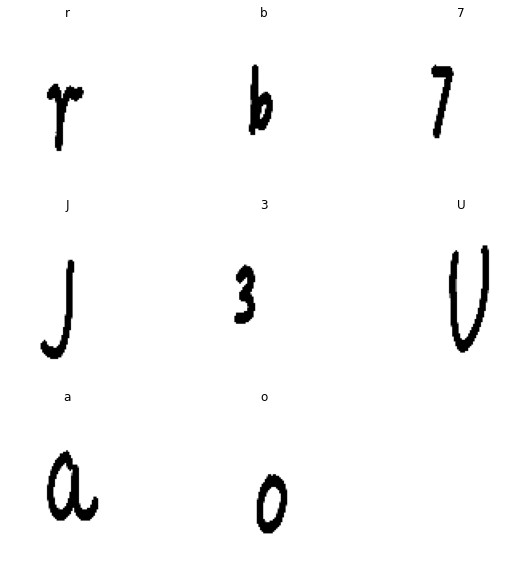

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [16]:
num_classes = 62
import tensorflow.keras.layers as layers
model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15
)

Epoch 1/15
248/248 [==============================] - 6s 24ms/step - loss: 4.0288 - accuracy: 0.0407 - val_loss: 3.3134 - val_accuracy: 0.1512
Epoch 2/15
248/248 [==============================] - 6s 25ms/step - loss: 2.7812 - accuracy: 0.2854 - val_loss: 2.3150 - val_accuracy: 0.4254
Epoch 3/15
248/248 [==============================] - 7s 28ms/step - loss: 1.4851 - accuracy: 0.6075 - val_loss: 2.1484 - val_accuracy: 0.5060
Epoch 4/15
248/248 [==============================] - 7s 28ms/step - loss: 0.8226 - accuracy: 0.7724 - val_loss: 2.1751 - val_accuracy: 0.5464
Epoch 5/15
248/248 [==============================] - 7s 27ms/step - loss: 0.4076 - accuracy: 0.8786 - val_loss: 2.3613 - val_accuracy: 0.5685
Epoch 6/15
248/248 [==============================] - 7s 27ms/step - loss: 0.2921 - accuracy: 0.9111 - val_loss: 2.5535 - val_accuracy: 0.5262
Epoch 7/15
248/248 [==============================] - 7s 26ms/step - loss: 0.2208 - accuracy: 0.9236 - val_loss: 2.6896 - val_accuracy: 0.5504

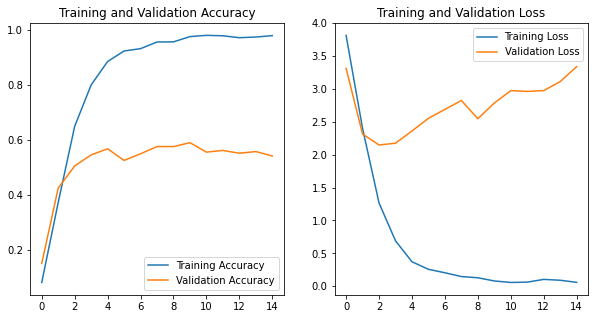

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

the large gap between training and validation accuracy tells that the model is overfitting. Training accuracy is 98% while validation accuracy is just 61%.

To correct overfitting, we add some Augmentation and Dropout Regualarization.

# Adding Dropout and Augmentation

In [18]:
model2 = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomZoom(0.2),
  layers.experimental.preprocessing.RandomContrast(0.2), 
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(2, 2),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(2, 2),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(2, 2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.4),
  layers.Dense(num_classes, activation='softmax')
])


In [19]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


#### The training part below was done using 0.4 as validation split. For the original 0.2 validation split refer to the training part below this code.

In [240]:
epochs = 30
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
186/186 [==============================] - 7s 32ms/step - loss: 4.1338 - accuracy: 0.0231 - val_loss: 4.1191 - val_accuracy: 0.0272
Epoch 2/30
186/186 [==============================] - 6s 31ms/step - loss: 4.0968 - accuracy: 0.0361 - val_loss: 3.8764 - val_accuracy: 0.0585
Epoch 3/30
186/186 [==============================] - 6s 31ms/step - loss: 3.8273 - accuracy: 0.0806 - val_loss: 3.1266 - val_accuracy: 0.1915
Epoch 4/30
186/186 [==============================] - 6s 31ms/step - loss: 3.3288 - accuracy: 0.1479 - val_loss: 2.6400 - val_accuracy: 0.2873
Epoch 5/30
186/186 [==============================] - 6s 31ms/step - loss: 2.8750 - accuracy: 0.2432 - val_loss: 2.3591 - val_accuracy: 0.3589
Epoch 6/30
186/186 [==============================] - 6s 31ms/step - loss: 2.6738 - accuracy: 0.2750 - val_loss: 2.0533 - val_accuracy: 0.4173
Epoch 7/30
186/186 [==============================] - 6s 31ms/step - loss: 2.4058 - accuracy: 0.3381 - val_loss: 1.8763 - val_accuracy: 0.4940

### Training with 0.2 Validation split.

In [20]:
epochs = 30
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
248/248 [==============================] - 9s 32ms/step - loss: 4.1323 - accuracy: 0.0180 - val_loss: 4.0370 - val_accuracy: 0.0323
Epoch 2/30
248/248 [==============================] - 7s 29ms/step - loss: 3.9187 - accuracy: 0.0660 - val_loss: 3.0412 - val_accuracy: 0.1935
Epoch 3/30
248/248 [==============================] - 8s 33ms/step - loss: 3.2195 - accuracy: 0.1665 - val_loss: 2.4335 - val_accuracy: 0.3327
Epoch 4/30
248/248 [==============================] - 8s 34ms/step - loss: 2.7221 - accuracy: 0.2694 - val_loss: 2.1864 - val_accuracy: 0.4012
Epoch 5/30
248/248 [==============================] - 8s 34ms/step - loss: 2.4254 - accuracy: 0.3388 - val_loss: 1.9891 - val_accuracy: 0.4435
Epoch 6/30
248/248 [==============================] - 9s 34ms/step - loss: 2.1225 - accuracy: 0.3989 - val_loss: 1.8413 - val_accuracy: 0.4819
Epoch 7/30
248/248 [==============================] - 9s 35ms/step - loss: 1.9149 - accuracy: 0.4380 - val_loss: 1.6153 - val_accuracy: 0.5524

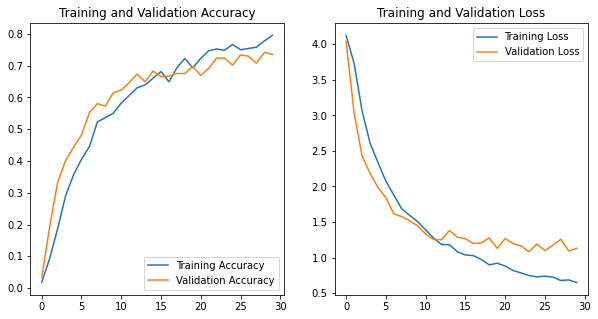

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### The final training and validation accuracy were 82% and 72% respectively. 
#### Let's save this model.

In [22]:
model2.save("main_model")

INFO:tensorflow:Assets written to: main_model/assets


In [23]:
model = keras.models.load_model("main_model")

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_zoom (RandomZoom)     (None, 100, 75, 3)        0         
_________________________________________________________________
random_contrast (RandomContr (None, 100, 75, 3)        0         
_________________________________________________________________
random_rotation (RandomRotat (None, 100, 75, 3)        0         
_________________________________________________________________
random_zoom_1 (RandomZoom)   (None, 100, 75, 3)        0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 100, 75, 3)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 98, 73, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 36, 32)       

#### Let's try testing the model on two images.

This image most likely belongs to N with a 4.05 percent confidence.


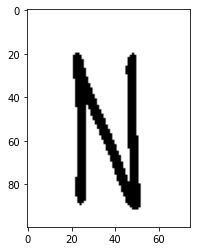

In [26]:
img = keras.preprocessing.image.load_img(
    "images/img024-003.png", target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
plt.imshow(img)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to 0 with a 2.81 percent confidence.


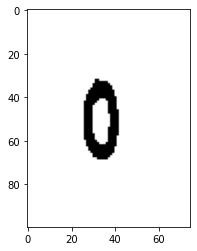

In [27]:
img = keras.preprocessing.image.load_img(
    "images/img001-008.png", target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
plt.imshow(img)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)